##**TASK #1**

**By Neehar phatak**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
def outlier_detection(df):
    # To detect the Null or NaN values and removing them to ensure that the numerical columns can be detected correctly.
    r = []
    for col in df.columns:
        for i in df.index:
            if df.loc[i, col]=='Null' or df.loc[i, col] == np.nan:
                r.append(i)
    df = df.drop(list(set(r)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    
    # Finding out the columns that have numerical values.
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                num_cols.append(col)
            except ValueError:
                pass
          
    # Removing the rows having values which can be called outliers on basis of z-score    
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    print(count)
    return df

In [9]:
df = outlier_detection(df)

0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


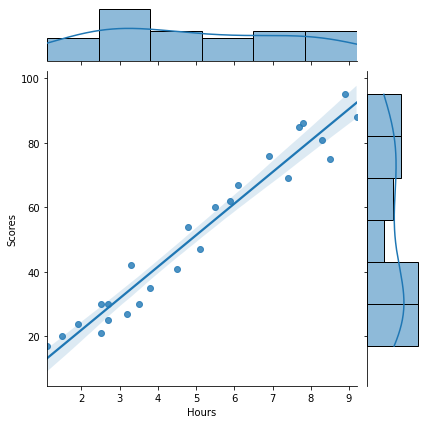

In [10]:
sns.jointplot(df['Hours'], df['Scores'], kind = "reg")
plt.show()

# Simple Regression

In [11]:

mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den
B0 = mean_y - B1*mean_x

print (B0)
print (B1)       

2.4836734053731746
9.775803390787475


In [12]:
df['predicted_Scores'] = B0 + B1*df['Hours']
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

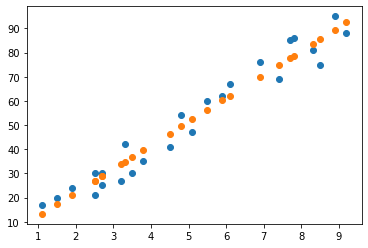

In [13]:
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

To predict the given value of 9.25

In [14]:
hrs = 9.25
score = B0 + B1*hrs
print (score)

92.90985477015732


Random Mean Sqaured Error [RMSE]

In [15]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_Scores'].values)
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y
print (rmse)

0.10439521325937494
